In [1]:
import os
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
%matplotlib inline

## Input Data FTIR

In [9]:
inputFolder0 = input('Masukkan Nama Folder FTIR: ')
namaFile0 = os.listdir('./'+inputFolder0)

ftir=pd.DataFrame()

for i in range(len(namaFile0)):
    namaFile0[i] = namaFile0[i].replace('.txt','')
    
for nf in namaFile0:
    df = pd.read_csv('./'+inputFolder0+'/'+nf+'.txt', delimiter='\s+',names=['λ (cm-1)','% Transmittance'])
    df = df.drop(index=0)
    ftir['λ (cm-1)']= df['λ (cm-1)']
    ftir=ftir.round(2)
    ftir['% Transmittance '+nf]=df['% Transmittance']

ftir['λ (cm-1)'] = ftir['λ (cm-1)'].astype(float, errors = 'raise')
ftir=ftir.round(2)


Masukkan Nama Folder FTIR: FTIR


## Input Nama Gambar

In [12]:
namaGambar0 = input('Masukkan Nama gambar olahan FTIR: ')
outputFolder = input('Masukkan nama folder tempat menyimpan data: ')
namaExcel = input('Masukan nama excel olahan FTIR: ')
os.mkdir(outputFolder)


Masukkan Nama gambar olahan FTIR: FTIR result for NSDD variation samples
Masukkan nama folder tempat menyimpan data: Hasil FTIR
Masukan nama excel olahan FTIR: FTIR result for NSDD variation samples


## FTIR Process

<ipython-input-29-3174782439d1>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()


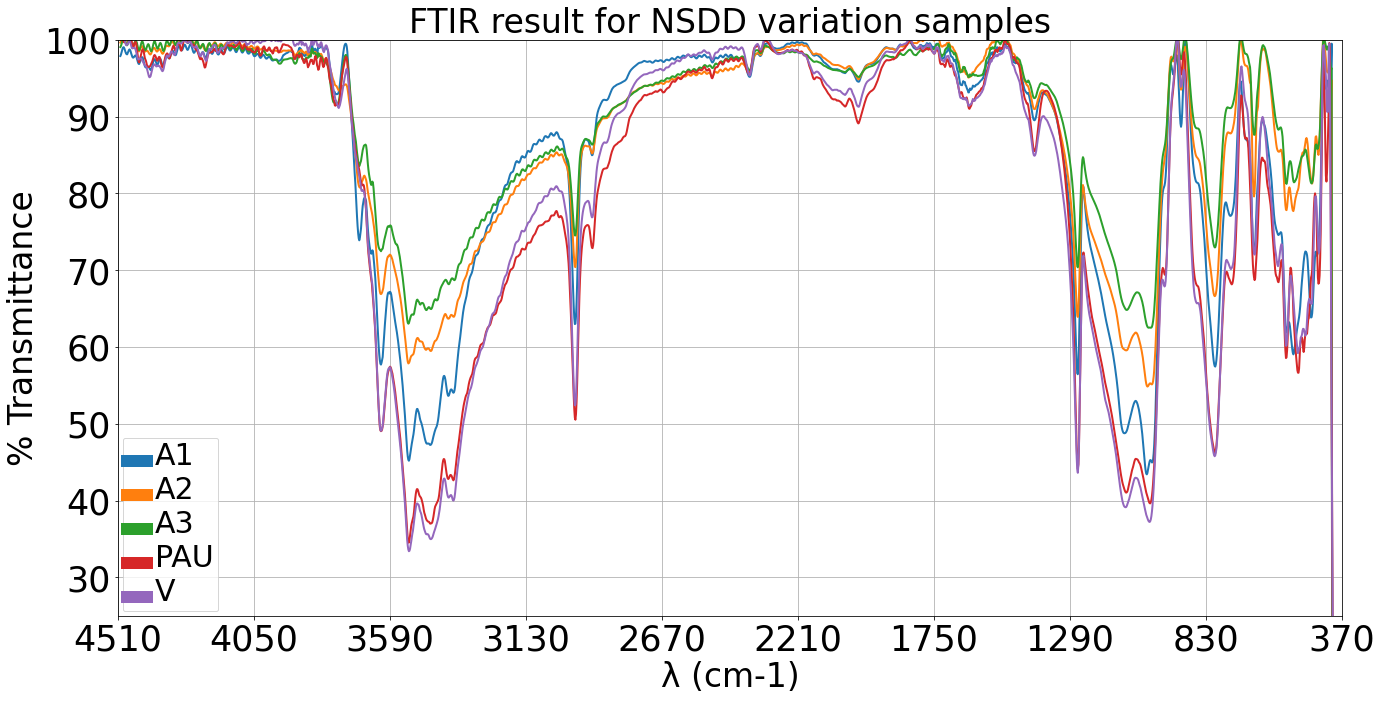

In [29]:
fig0 = plt.figure(figsize = (20,10))
axes0 = fig0.add_axes([0.1,0.1,0.85,0.8])
i = 0


for nf in namaFile0:
    axes0.plot(ftir['λ (cm-1)'],ftir['% Transmittance '+nf],linewidth=2,label=nf)

axes0.legend()
axes0.set_title(namaGambar0, fontsize = 33)
axes0.set_xlabel('λ (cm-1)', fontsize = 33)
axes0.set_ylabel('% Transmittance', fontsize = 33)
axes0.set_ylim([25,100])
axes0.set_xlim([4510,370])
axes0.set_xticks(np.linspace(4510,370,10))
axes0.grid()

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(12)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)

for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(35)

fig0.show()

In [30]:
fig0.savefig(fname='./'+outputFolder+'/'+namaGambar0,quality=100,dpi=200)
ftir.to_excel(excel_writer='./'+outputFolder+'/'+namaExcel+'.xlsx',index=False)

<ipython-input-30-6af9110191bb>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+namaGambar0,quality=100,dpi=200)
